# Fuel Economy Analysis and Prediction
This project focuses on analyzing and predicting the fuel economy of vehicles using data from the U.S. Environmental Protection Agency (EPA) from the years **2008 to 2018**.
##Uploading and Reading Data
We begin by uploading and reading EPA fuel economy data files from **2008 to 2018**. These files are in `.xls` and `.xlsx` formats, containing detailed information about vehicles, their fuel types, emissions, mileage, and more.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving all_alpha_18.xlsx to all_alpha_18.xlsx
Saving all_alpha_17.xlsx to all_alpha_17.xlsx
Saving all_alpha_16.xlsx to all_alpha_16.xlsx
Saving all_alpha_15.xlsx to all_alpha_15.xlsx
Saving all_alpha_14.xlsx to all_alpha_14.xlsx
Saving all_alpha_13.xlsx to all_alpha_13.xlsx
Saving all_alpha_12.xlsx to all_alpha_12.xlsx
Saving all_alpha_11.xlsx to all_alpha_11.xlsx
Saving all_alpha_10.xls to all_alpha_10.xls
Saving all_alpha_09.xls to all_alpha_09.xls
Saving all_alpha_08.xls to all_alpha_08.xls


In [ ]:
import pandas as pd

In [ ]:
df_8 = pd.read_excel("all_alpha_08.xls", engine='xlrd')
df_13 = pd.read_excel("all_alpha_13.xlsx")
df_12 = pd.read_excel("all_alpha_12.xlsx")
df_9 = pd.read_excel("all_alpha_09.xls", engine='xlrd')
df_11 = pd.read_excel("all_alpha_11.xlsx")
df_17 = pd.read_excel("all_alpha_17.xlsx")
df_10 = pd.read_excel("all_alpha_10.xls", engine='xlrd')
df_18 = pd.read_excel("all_alpha_18.xlsx")
df_16 = pd.read_excel("all_alpha_16.xlsx")
df_15 = pd.read_excel("all_alpha_15.xlsx")
df_14 = pd.read_excel("all_alpha_14.xlsx")

In [ ]:
dfs = {
    2008: df_8,
    2009: df_9,
    2010: df_10,
    2011: df_11,
    2012: df_12,
    2013: df_13,
    2014: df_14,
    2015: df_15,
    2016: df_16,
    2017: df_17,
    2018: df_18
}

year = [2008, 2013, 2012, 2009, 2011, 2017, 2010, 2018, 2016, 2015, 2014]

## Problem 1: Initial Data Inspection and Cleaning

In this step, we perform a preliminary analysis of EPA vehicle data (2008–2018). Our goals are:

- Determine the number of samples (rows) in each year  
- Check the number of columns in each dataset  
- Detect and review duplicate rows  
- Examine the datatypes of all columns  
- Identify features with missing values  
- Count non-null unique values for each feature  
- Review unique values and their counts per feature  
- Perform grouping analysis on categorical features like Fuel, Drive, Veh Class, etc.

-----

We start by reviewing the top 5 records of each year’s dataset.


In [ ]:
for i in sorted(year):
  print(f"Year {i}:")
  display(dfs[i].head(5))

Year 2008:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


Year 2009:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,CA,U2,LEV-II ULEV,9HNXT03.7H29,SUV,7,15,20,17,3,no
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,FA,B5,Bin 5,9HNXT03.7H29,SUV,6,15,20,17,3,no
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,LEV-II ULEV,9HNXT02.3R29,SUV,7,17,22,19,4,no
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,FA,B5,Bin 5,9HNXT02.3R29,SUV,6,17,22,19,4,no
4,ACURA RL,3.7,6.0,Auto-S5,4WD,Gasoline,CA,U2,LEV-II ULEV,9HNXV03.7FB9,midsize car,7,16,22,18,4,no


Year 2010:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,AHNXT03.7W19,SUV,7,16,21,18,4,no
1,ACURA MDX,3.7,6.0,SemiAuto-6,4WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,AHNXT03.7W19,SUV,6,16,21,18,4,no
2,ACURA RDX,2.3,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,AHNXT02.3Y19,SUV,7,19,24,21,5,no
3,ACURA RDX,2.3,4.0,SemiAuto-5,4WD,Gasoline,CA,U2,California LEV-II ULEV,AHNXT02.3Y19,SUV,7,17,22,19,4,no
4,ACURA RDX,2.3,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,AHNXT02.3Y19,SUV,6,19,24,21,5,no


Year 2011:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,BHNXT03.7M19,SUV,6,16,21,18,3,no
1,ACURA MDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,BHNXT03.7M19,SUV,5,16,21,18,3,no
2,ACURA RDX,2.3,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,BHNXT02.3X19,SUV,6,19,24,21,4,no
3,ACURA RDX,2.3,4.0,SemiAuto-5,4WD,Gasoline,CA,U2,California LEV-II ULEV,BHNXT02.3X19,SUV,6,17,22,19,3,no
4,ACURA RDX,2.3,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,BHNXT02.3X19,SUV,5,19,24,21,4,no


Year 2012:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,6.0,SemiAuto-6,4WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,CHNXT03.7R19,SUV,5,16,21,18,3,no
1,ACURA MDX,3.7,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,CHNXT03.7R19,SUV,6,16,21,18,3,no
2,ACURA RDX,2.3,4.0,SemiAuto-5,4WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,CHNXT02.3Y19,SUV,5,17,22,19,3,no
3,ACURA RDX,2.3,4.0,SemiAuto-5,4WD,Gasoline,CA,U2,California LEV-II ULEV,CHNXT02.3Y19,SUV,6,17,22,19,3,no
4,ACURA RDX,2.3,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,CHNXT02.3Y19,SUV,5,19,24,21,4,no


Year 2013:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,FC,B3,Federal Tier 2 Bin 3,DHNXV01.5WF2,small car,7,39,38,38,9,Yes,228
1,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,FA,B2,Federal Tier 2 Bin 2,DHNXV01.5YD2,small car,8,39,38,38,9,Yes,228
2,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,CA,PZEV,California PZEV,DHNXV01.5YD2,small car,9,39,38,38,9,Yes,228
3,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,DHNXV02.0CB2,small car,5,24,35,28,7,No,318
4,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,DHNXV02.0CB2,small car,6,24,35,28,7,Yes,318


Year 2014:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,FA,B2,Federal Tier 2 Bin 2,EHNXV01.58D2,small car,9,39,38,38,9,Yes,228
1,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,CA,PZEV,California PZEV,EHNXV01.58D2,small car,9,39,38,38,9,Yes,228
2,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,EHNXV02.0EB3,small car,5,24,35,28,7,No,318
3,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,EHNXV02.0EB3,small car,6,24,35,28,7,Yes,318
4,ACURA ILX,2.4,4.0,Man-6,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,EHNXV02.4RB3,small car,5,22,31,25,6,No,361


Year 2015:


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,FHNXV02.0JA3,small car,5,24,35,28,7,No,316
1,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,FHNXV02.0JA3,small car,6,24,35,28,7,Yes,316
2,ACURA ILX,2.4,4.0,Man-6,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,FHNXV02.4KA3,small car,5,22,31,25,6,No,350
3,ACURA ILX,2.4,4.0,Man-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,FHNXV02.4KA3,small car,6,22,31,25,6,No,350
4,ACURA MDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,FHNXV03.5XA4,small SUV,5,18,27,21,5,No,416


Year 2016:


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AutoMan-8,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,GHNXV02.4XH3,small car,5,25,36,29,7,No,305
1,ACURA ILX,2.4,4.0,AutoMan-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,GHNXV02.4XH3,small car,6,25,36,29,7,Yes,305
2,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,GHNXV03.5VA3,small SUV,5,19,27,22,5,No,403
3,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,GHNXV03.5VA3,small SUV,5,20,27,23,5,No,390
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,U2,California LEV-II ULEV,GHNXV03.5VA3,small SUV,6,19,27,22,5,No,403


Year 2017:


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV03.0HH3,small SUV,6,26,27,27,6,No,329
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV03.0HH3,small SUV,6,26,27,27,6,No,329
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV03.5VH3,small SUV,6,19,27,22,5,No,404


Year 2018:


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


In [ ]:
print("_" * 50)
for i in sorted(year):
    print(f"Year {i}:")
    df = dfs[i]

    # Basic info
    print(f"No. of rows: {df.shape[0]}")
    print(f"No. of columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())

    # Duplicate rows
    num_duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {num_duplicates}")
    if num_duplicates > 0:
        display(df[df.duplicated()])

    # Data types
    print("Data types:")
    display(df.dtypes)

    # Missing values
    print("Missing values per column:")
    display(df.isnull().sum())

    # Number of unique non-null values
    print("Number of non-null unique values per column:")
    display(df.nunique())

    # Unique values and their counts
    for col in df.columns:
        print(f"Value counts for column: {col}")
        display(df[col].value_counts(dropna=False))

    print("_" * 50)


__________________________________________________
Year 2008:
No. of rows: 2189
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,object
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,14
Fuel,5
Sales Area,3
Cyl,8
Model,411
Greenhouse Gas Score,20
City MPG,39
Hwy MPG,43
Underhood ID,323
Displ,46


Value counts for column: Trans


,count
Trans,
Auto-L4,488
Auto-L5,329
Auto-S6,327
Man-6,293
Man-5,269
Auto-S5,147
Auto-L6,118
Auto-AV,86
Auto-S4,42


Value counts for column: Fuel


,count
Fuel,
Gasoline,2113
ethanol/gas,66
diesel,7
CNG,2
ethanol,1


Value counts for column: Sales Area


,count
Sales Area,
FA,1044
CA,1003
FC,142


Value counts for column: Cyl


,count
Cyl,
(6 cyl),864
(4 cyl),592
(8 cyl),525
(5 cyl),113
(12 cyl),60
(10 cyl),29
(2 cyl),4
(16 cyl),2


Value counts for column: Model


,count
Model,
GMC Sierra 15,25
FORD Ranger,24
HONDA Accord,22
CHEVROLET Silverado 15,20
NISSAN Altima,20
...,...
MERCURY Grand Marquis FFV,1
MERCEDES-BENZ CLK550,1
FORD Crown Victoria FFV,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
6,585
5,380
7,323
4,285
3,165
2,148
8,131
0,50
1,33


Value counts for column: City MPG


,count
City MPG,
17,233
16,216
15,213
20,195
19,182
18,176
14,172
13,160
12,127


Value counts for column: Hwy MPG


,count
Hwy MPG,
24,237
20,174
25,169
26,167
28,146
19,144
22,143
18,124
27,123


Value counts for column: Underhood ID


,count
Underhood ID,
8BMXB03.0N52,46
8GMXT05.3384,40
8BMXV03.0N54,32
8VVXV02.5U2T,32
8ADXV02.0366,28
...,...
8GMXT02.4135,1
8GMXT04.2188,1
8GMXT02.4124,1


Value counts for column: Displ


,count
Displ,
2.4,182
3.5,182
2.5,171
3.0,158
2.0,132
3.6,110
5.3,102
3.7,86
4.0,80


Value counts for column: Veh Class


,count
Veh Class,
small car,690
SUV,626
midsize car,276
pickup,258
large car,129
station wagon,123
van,50
minivan,37


Value counts for column: Cmb MPG


,count
Cmb MPG,
22,211
20,211
19,196
18,183
21,166
15,164
14,148
16,144
17,139


Value counts for column: Drive


,count
Drive,
2WD,1463
4WD,726


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
6,1454
7,514
9.5,80
6/6,32
3,31
9,23
3/3,21
8,15
7/7,12


Value counts for column: SmartWay


,count
SmartWay,
no,1557
yes,632


Value counts for column: Stnd


,count
Stnd,
B5,978
L2,509
U2,403
B4,123
S2,76
B8,52
B2,16
B3,15
SLEV,11


__________________________________________________
Year 2009:
No. of rows: 2346
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,19
Fuel,5
Sales Area,3
Cyl,8
Model,450
Greenhouse Gas Score,25
City MPG,45
Hwy MPG,48
Underhood ID,346
Displ,46


Value counts for column: Trans


,count
Trans,
Auto-S6,412
Man-6,360
Auto-L4,346
Auto-L5,301
Man-5,269
Auto-L6,256
Auto-S5,127
Auto-AV,93
Auto-S7,48


Value counts for column: Fuel


,count
Fuel,
Gasoline,2204
ethanol/gas,127
diesel,12
CNG,2
Ethanol/Gas,1


Value counts for column: Sales Area


,count
Sales Area,
FA,1129
CA,1045
FC,172


Value counts for column: Cyl


,count
Cyl,
6.0,843
4.0,751
8.0,556
5.0,110
12.0,52
10.0,26
2.0,4
3.0,4


Value counts for column: Model


,count
Model,
CHEVROLET Silverado 15,36
GMC Sierra 15,36
VOLKSWAGEN Jetta SportWagen,24
VOLKSWAGEN Jetta,20
GMC Canyon,18
...,...
LINCOLN Navigator FFV,1
LINCOLN Town Car FFV,1
ISUZU Ascender,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,501
4,381
3,305
6,299
7,298
8,122
2,118
1,79
0,76


Value counts for column: City MPG


,count
City MPG,
17,296
18,224
16,220
15,206
14,204
20,177
19,160
21,136
22,100


Value counts for column: Hwy MPG


,count
Hwy MPG,
25,215
26,194
20,188
24,188
28,165
23,151
27,146
19,128
22,120


Value counts for column: Underhood ID


,count
Underhood ID,
9BMXB03.0N5R,48
9GMXT05.3384,45
9PRXV03.8CDI,40
9ADXV02.03UA,40
9VVXV02.5U2T,32
...,...
9GMXT02.4130,1
9GMXT02.4135,1
9GMXT02.4123,1


Value counts for column: Displ


,count
Displ,
2.5,210
2.0,209
2.4,196
3.5,177
3.0,159
5.3,119
3.6,107
4.0,98
3.7,94


Value counts for column: Veh Class


,count
Veh Class,
small car,810
SUV,654
midsize car,267
pickup,248
station wagon,174
large car,134
minivan,32
van,27


Value counts for column: Cmb MPG


,count
Cmb MPG,
20,279
21,226
18,200
16,183
19,181
22,167
23,132
17,122
24,119


Value counts for column: Drive


,count
Drive,
2WD,1568
4WD,778


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
6,1486
7,568
9.5,104
6/6,66
7/7,53
9,32
8,13
Mod,12
3/3,7


Value counts for column: SmartWay


,count
SmartWay,
no,1743
yes,603


Value counts for column: Stnd


,count
Stnd,
B5,1086
L2,468
U2,459
B4,162
S2,112
B2,24
B3,13
Mod,12
B8,10


__________________________________________________
Year 2010:
No. of rows: 2140
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,16
Fuel,5
Sales Area,3
Cyl,9
Model,469
Greenhouse Gas Score,27
City MPG,45
Hwy MPG,57
Underhood ID,336
Displ,49


Value counts for column: Trans


,count
Trans,
SemiAuto-6,461
Man-6,366
Auto-5,217
Auto-4,216
Man-5,211
Auto-6,180
Auto-7,111
CVT,111
SemiAuto-5,97


Value counts for column: Fuel


,count
Fuel,
Gasoline,2011
Ethanol/Gas,103
Diesel,22
Ethanol,2
CNG,2


Value counts for column: Sales Area


,count
Sales Area,
FA,1037
CA,961
FC,142


Value counts for column: Cyl


,count
Cyl,
6.0,797
4.0,775
8.0,390
5.0,76
12.0,62
10.0,30
2.0,4
3.0,4
16.0,2


Value counts for column: Model


,count
Model,
TOYOTA Tacoma,18
VOLKSWAGEN Jetta,18
BMW 328i,16
NISSAN Frontier,16
BMW 328Ci,16
...,...
CADILLAC Escalade Hybrid,1
FORD Crown Victoria FFV,1
FORD Escape FFV,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,411
7,372
4,319
6,301
3,209
8,152
2,83
0,70
1,67


Value counts for column: City MPG


,count
City MPG,
18,258
17,232
16,189
21,155
15,147
19,138
22,129
20,128
14,110


Value counts for column: Hwy MPG


,count
Hwy MPG,
25,201
27,179
26,166
28,130
23,129
24,122
20,113
22,110
31,103


Value counts for column: Underhood ID


,count
Underhood ID,
ABMXJ03.0E89,52
APRXV03.8CDI,40
AGMXV02.4027,32
AADXV02.03UA,28
ABMXV03.051R,28
...,...
AKMXV02.4UPC,1
AHYXV02.4SPC,1
AHYXV02.0HPC,1


Value counts for column: Displ


,count
Displ,
2.0,224
2.4,218
3.0,199
2.5,197
3.5,179
3.6,94
4.0,92
3.8,80
3.7,71


Value counts for column: Veh Class


,count
Veh Class,
small car,820
SUV,553
midsize car,281
station wagon,161
pickup,150
large car,129
minivan,31
van,14
special purpose,1


Value counts for column: Cmb MPG


,count
Cmb MPG,
20,208
21,205
22,191
19,162
18,155
25,136
24,121
23,110
17,106


Value counts for column: Drive


,count
Drive,
2WD,1456
4WD,684


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
6,1246
7,592
9.5,102
6/6,52
7/7,46
8,42
9,33
Mod,18
3,4


Value counts for column: SmartWay


,count
SmartWay,
no,1428
yes,712


Value counts for column: Stnd


,count
Stnd,
B5,954
U2,465
L2,339
B4,166
S2,129
B3,42
Mod,18
L2OP,14
B8,7


__________________________________________________
Year 2011:
No. of rows: 1997
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,17
Fuel,5
Sales Area,3
Cyl,9
Model,484
Greenhouse Gas Score,22
City MPG,53
Hwy MPG,66
Underhood ID,341
Displ,48


Value counts for column: Trans


,count
Trans,
SemiAuto-6,426
Man-6,364
Auto-6,242
Auto-5,159
Man-5,142
Auto-4,133
Auto-7,129
CVT,113
SemiAuto-8,76


Value counts for column: Fuel


,count
Fuel,
Gasoline,1823
Ethanol/Gas,146
Diesel,23
CNG,4
Electricity/Gasoline,1


Value counts for column: Sales Area


,count
Sales Area,
FA,941
CA,863
FC,193


Value counts for column: Cyl


,count
Cyl,
6.0,774
4.0,713
8.0,400
12.0,42
5.0,38
10.0,20
2.0,4
3.0,4
16.0,2


Value counts for column: Model


,count
Model,
TOYOTA Tacoma,20
BMW 328i,16
NISSAN Frontier,16
BMW 328Ci,16
KIA Sportage,14
...,...
FORD Mustang Convertible,1
FORD Crown Victoria FFV,1
FORD Transit Connect,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
4,394
5,384
3,271
1,252
6,223
7,168
2,102
1/1,57
8,20


Value counts for column: City MPG


,count
City MPG,
18,236
17,208
19,160
16,154
20,135
21,113
15,113
22,112
14,108


Value counts for column: Hwy MPG


,count
Hwy MPG,
27,169
25,162
26,155
28,136
20,130
...,...
22/32,1
90/40,1
22/29,1


Value counts for column: Underhood ID


,count
Underhood ID,
BPRXV03.8CDI,50
BBMXJ03.0E89,44
BGMXT05.3373,30
BBMXJ03.0N55,30
BBMXV03.051R,28
...,...
BCRXT03.6UPA,1
BRIIV05.0VD5,1
BFMXT02.01DV,1


Value counts for column: Displ


,count
Displ,
3.0,204
2.0,199
3.5,195
2.4,190
2.5,165
3.6,94
3.8,78
1.6,75
4.0,74


Value counts for column: Veh Class


,count
Veh Class,
small car,725
SUV,537
midsize car,257
pickup,150
station wagon,138
large car,131
van,34
minivan,22
special purpose,3


Value counts for column: Cmb MPG


,count
Cmb MPG,
21,227
22,169
20,168
19,158
24,115
18,112
23,102
17,100
26,98


Value counts for column: Drive


,count
Drive,
2WD,1337
4WD,660


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
5,1058
6,617
9,83
5/5,77
6/6,55
8,38
7,35
Mod,18
2/2,12


Value counts for column: SmartWay


,count
SmartWay,
no,1667
yes,330


Value counts for column: Stnd


,count
Stnd,
B5,875
U2,479
L2,251
B4,190
S2,110
B3,35
Mod,18
B8,14
L2OP,14


__________________________________________________
Year 2012:
No. of rows: 2066
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,23
Fuel,5
Sales Area,3
Cyl,8
Model,490
Greenhouse Gas Score,11
City MPG,62
Hwy MPG,75
Underhood ID,350
Displ,47


Value counts for column: Trans


,count
Trans,
SemiAuto-6,418
Man-6,379
Auto-6,259
Auto-7,170
Auto-5,133
Man-5,121
CVT,118
SemiAuto-8,100
Auto-4,93


Value counts for column: Fuel


,count
Fuel,
Gasoline,1855
Ethanol/Gas,180
Diesel,22
Gasoline/Electricity,5
CNG,4


Value counts for column: Sales Area


,count
Sales Area,
FA,1084
CA,876
FC,106


Value counts for column: Cyl


,count
Cyl,
4.0,790
6.0,723
8.0,419
12.0,60
5.0,48
10.0,20
3.0,4
16.0,2


Value counts for column: Model


,count
Model,
BMW 328i,22
VOLKSWAGEN Jetta,18
HONDA Accord,18
MAZDA 3,18
TOYOTA Tacoma,18
...,...
CHEVROLET Volt,1
BUICK Verano,1
CHRYSLER Town & Country,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,425
4,372
1,305
6,266
3,263
7,220
2,126
8,40
Mod,20


Value counts for column: City MPG


,count
City MPG,
18,224
19,176
17,167
20,148
16,135
...,...
15/21,1
9/11,1
35/95,1


Value counts for column: Hwy MPG


,count
Hwy MPG,
27,166
25,160
28,150
26,122
23,117
...,...
19/25,1
13,1
26/36,1


Value counts for column: Underhood ID


,count
Underhood ID,
CPRXV03.8CDI,58
CBMXV04.4N63,38
CBMXJ03.0E89,30
CSKXV2.395F1,28
CMBXV05.5U2B,28
...,...
CGMXV01.4001,1
CTKXV02.5NC1,1
CFMXT03.01DG,1


Value counts for column: Displ


,count
Displ,
2.0,254
2.4,195
3.5,191
3.0,168
2.5,164
3.6,97
1.6,79
3.8,74
3.7,68


Value counts for column: Veh Class


,count
Veh Class,
small car,839
SUV,491
midsize car,271
large car,150
pickup,131
station wagon,130
van,34
minivan,15
special purpose,5


Value counts for column: Cmb MPG


,count
Cmb MPG,
21,212
22,172
19,144
20,140
23,121
...,...
37/94,1
16/23,1
11,1


Value counts for column: Drive


,count
Drive,
2WD,1409
4WD,657


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
5,1115
6,735
9,93
7,36
8,35
2,31
Mod,20
3,1


Value counts for column: SmartWay


,count
SmartWay,
no,1639
yes,425
Elite,2


Value counts for column: Stnd


,count
Stnd,
B5,853
U2,493
B4,247
L2,244
PZEV,93
B3,36
B8,31
S2,22
Mod,20


__________________________________________________
Year 2013:
No. of rows: 2184
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,22
Fuel,6
Sales Area,3
Cyl,8
Model,513
Greenhouse Gas Score,11
City MPG,66
Hwy MPG,84
Underhood ID,340
Displ,49


Value counts for column: Trans


,count
Trans,
SemiAuto-6,440
Man-6,358
Auto-6,260
SemiAuto-8,208
Auto-7,140
CVT,132
Man-5,110
Auto-5,88
Auto-4,68


Value counts for column: Fuel


,count
Fuel,
Gasoline,1949
Ethanol/Gas,189
Diesel,33
Gasoline/Electricity,8
CNG,4
Gasoline/Electricty,1


Value counts for column: Sales Area


,count
Sales Area,
FA,989
CA,945
FC,250


Value counts for column: Cyl


,count
Cyl,
4.0,927
6.0,694
8.0,448
12.0,52
5.0,45
10.0,12
3.0,4
16.0,2


Value counts for column: Model


,count
Model,
BMW 328i,22
VOLKSWAGEN Jetta,22
HONDA Accord,20
MAZDA 3,20
TOYOTA Tacoma,20
...,...
FORD Fiesta SFE,1
FORD Focus SFE FFV,1
FORD Fusion Hybrid,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,495
6,383
4,371
7,292
8,250
3,166
2,109
10,40
9,31


Value counts for column: City MPG


,count
City MPG,
19,182
18,176
16,169
22,157
20,154
...,...
17/24,1
20/28,1
19/26,1


Value counts for column: Hwy MPG


,count
Hwy MPG,
28,168
25,147
30,145
24,133
27,127
...,...
19/26,1
17/25,1
49/102,1


Value counts for column: Underhood ID


,count
Underhood ID,
DBMXV01.6N18,50
DBMXV04.4N63,38
DBMXJ03.0N55,32
DMBXV05.5U2A,32
DPRXV03.8C91,32
...,...
DGMXV01.4001,1
DNSXV01.881B,1
DNSXV02.585A,1


Value counts for column: Displ


,count
Displ,
2.0,346
3.5,204
3.0,181
2.4,179
2.5,140
1.6,131
3.6,98
1.8,87
3.7,76


Value counts for column: Veh Class


,count
Veh Class,
small car,861
midsize car,359
small SUV,337
standard SUV,189
large car,153
pickup,119
station wagon,102
van,34
minivan,21


Value counts for column: Cmb MPG


,count
Cmb MPG,
21,207
19,161
26,156
22,141
23,126
...,...
23/33,1
22/30,1
11,1


Value counts for column: Drive


,count
Drive,
2WD,1465
4WD,719


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
5,1085
6,809
9,121
8,59
7,53
Mod,31
2,26


Value counts for column: SmartWay


,count
SmartWay,
No,1691
Yes,480
Elite,12
yes,1


Value counts for column: Stnd


,count
Stnd,
B5,869
U2,569
B4,240
L2,203
PZEV,121
B3,53
B2,35
Mod,31
B8,26


__________________________________________________
Year 2014:
No. of rows: 2275
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,26
Fuel,5
Sales Area,3
Cyl,9
Model,545
Greenhouse Gas Score,11
City MPG,76
Hwy MPG,91
Underhood ID,373
Displ,49


Value counts for column: Trans


,count
Trans,
SemiAuto-6,466
SemiAuto-8,302
Man-6,301
Auto-6,257
Auto-7,140
CVT,134
AMS-7,100
Man-5,99
Auto-5,66


Value counts for column: Fuel


,count
Fuel,
Gasoline,2006
Ethanol/Gas,188
Diesel,57
Gasoline/Electricity,20
CNG,4


Value counts for column: Sales Area


,count
Sales Area,
FA,1028
CA,983
FC,264


Value counts for column: Cyl


,count
Cyl,
4.0,965
6.0,741
8.0,450
12.0,54
5.0,27
10.0,20
3.0,14
2.0,2
16.0,2


Value counts for column: Model


,count
Model,
VOLKSWAGEN Beetle,22
HONDA Accord,22
VOLKSWAGEN Jetta,20
TOYOTA Tacoma,20
FORD Fusion,16
...,...
FERRARI LaFerrari,1
CHEVROLET Impala Limited,1
CADILLAC XTS Limo,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,446
7,425
6,369
4,290
8,233
3,170
2,163
9,62
1,45


Value counts for column: City MPG


,count
City MPG,
18,165
22,159
19,154
20,154
16,148
...,...
9/11,1
47/124,1
20/28,1


Value counts for column: Hwy MPG


,count
Hwy MPG,
28,156
25,137
30,134
24,128
26,122
...,...
46/105,1
19/26,1
28/40,1


Value counts for column: Underhood ID


,count
Underhood ID,
EBMXV01.6N18,56
EPRXV03.8C91,50
EBMXJ02.0N20,44
EMBXV05.5U2A,42
EBMXV04.4N63,36
...,...
EFMXV01.6VDD,1
ENSXV01.881B,1
EPGNV06.0ABC,1


Value counts for column: Displ


,count
Displ,
2.0,368
3.5,224
3.0,178
2.5,143
1.6,140
2.4,139
1.8,111
3.6,108
3.7,72


Value counts for column: Veh Class


,count
Veh Class,
small car,880
midsize car,422
small SUV,330
standard SUV,203
large car,188
pickup,100
station wagon,80
van,34
minivan,21


Value counts for column: Cmb MPG


,count
Cmb MPG,
21,178
26,160
19,137
23,129
22,122
...,...
14/21,2
50/95,2
19/27,1


Value counts for column: Drive


,count
Drive,
2WD,1469
4WD,806


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
5,1068
6,882
9,126
7,89
8,43
Mod,43
2,24


Value counts for column: SmartWay


,count
SmartWay,
No,1695
Yes,569
Elite,10
yes,1


Value counts for column: Stnd


,count
Stnd,
B5,877
U2,608
B4,262
L2,193
PZEV,102
B3,87
Mod,43
L3SULEV30,24
B8,24


__________________________________________________
Year 2015:
No. of rows: 2345
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,27
Fuel,6
Sales Area,3
Cyl,9
Model,580
Greenhouse Gas Score,11
City MPG,77
Hwy MPG,90
Underhood ID,374
Displ,49


Value counts for column: Trans


,count
Trans,
SemiAuto-6,546
SemiAuto-8,388
Man-6,289
Auto-6,171
Auto-7,132
AMS-7,122
CVT,109
Auto-8,81
Man-5,80


Value counts for column: Fuel


,count
Fuel,
Gasoline,2121
Ethanol/Gas,122
Diesel,72
Gasoline/Electricity,26
CNG/Gasoline,2
CNG,2


Value counts for column: Sales Area


,count
Sales Area,
FA,1047
CA,1035
FC,263


Value counts for column: Cyl


,count
Cyl,
4.0,1033
6.0,792
8.0,425
12.0,54
3.0,17
10.0,12
5.0,8
2.0,2
16.0,2


Value counts for column: Model


,count
Model,
HONDA Accord,22
VOLKSWAGEN Jetta,20
MAZDA 3,20
VOLKSWAGEN Beetle,16
TOYOTA Tacoma,16
...,...
CHEVROLET Captiva,1
FORD Transit T150,1
FORD Transit T150 FFV,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,638
6,407
7,399
4,387
8,156
3,151
Mod,54
2,45
9,43


Value counts for column: City MPG


,count
City MPG,
18,182
19,181
20,174
17,159
22,152
...,...
53,2
17/22,1
14/17,1


Value counts for column: Hwy MPG


,count
Hwy MPG,
28,170
26,147
25,139
24,131
31,130
...,...
13/19,1
17/25,1
16/23,1


Value counts for column: Underhood ID


,count
Underhood ID,
FPRXV04.0C91,62
FBMXJ02.0N20,58
FBMXV01.6N18,48
FBMXJ03.0N55,42
FBMXV04.4N63,38
...,...
FFMXT03.55HV,1
FNSXV01.881B,1
FNSXV02.585A,1


Value counts for column: Displ


,count
Displ,
2.0,443
3.0,242
3.5,199
2.4,133
1.6,126
2.5,122
1.8,114
3.6,101
3.7,66


Value counts for column: Veh Class


,count
Veh Class,
small car,933
midsize car,394
small SUV,357
standard SUV,208
large car,202
pickup,98
station wagon,85
special purpose,28
minivan,22


Value counts for column: Cmb MPG


,count
Cmb MPG,
22,169
21,166
26,158
19,152
23,143
...,...
21/28,1
16/20,1
19/25,1


Value counts for column: Drive


,count
Drive,
2WD,1490
4WD,855


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
5,1063
6,925
9,130
7,106
Mod,54
8,49
2,18


Value counts for column: SmartWay


,count
SmartWay,
No,1859
Yes,477
Elite,9


Value counts for column: Stnd


,count
Stnd,
B5,891
U2,548
B4,268
L2,164
B3,81
PZEV,79
L3ULEV125,60
Mod,54
L2ULEV125,52


__________________________________________________
Year 2016:
No. of rows: 2527
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,object
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,25
Fuel,4
Sales Area,2
Cyl,8
Model,591
Greenhouse Gas Score,11
City MPG,75
Hwy MPG,89
Underhood ID,375
Displ,45


Value counts for column: Trans


,count
Trans,
SemiAuto-6,582
SemiAuto-8,432
Man-6,307
Auto-6,203
Auto-7,124
Auto-8,121
AMS-7,120
CVT,118
Man-5,73


Value counts for column: Fuel


,count
Fuel,
Gasoline,2307
Ethanol/Gas,130
Diesel,52
Gasoline/Electricity,38


Value counts for column: Sales Area


,count
Sales Area,
FA,1277
CA,1250


Value counts for column: Cyl


,count
Cyl,
4.0,1164
6.0,846
8.0,418
12.0,65
5.0,14
3.0,12
10.0,6
2.0,2


Value counts for column: Model


,count
Model,
GMC Sierra 15,28
CHEVROLET Silverado 15,28
MAZDA 3,22
FORD F150,20
HONDA Accord,18
...,...
KIA Sedona SXL,2
KIA Sedona SX,2
MERCEDES-BENZ E550 4Matic,2


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,691
4,506
6,420
7,382
3,189
8,131
2,73
9,40
1,39


Value counts for column: City MPG


,count
City MPG,
20,206
19,194
22,185
18,177
16,171
...,...
23/43,2
21/48,2
58,2


Value counts for column: Hwy MPG


,count
Hwy MPG,
26,192
31,177
28,153
24,149
23,130
...,...
53,2
27/54,2
48,2


Value counts for column: Underhood ID


,count
Underhood ID,
GPRXV04.0C91,78
GBMXJ03.0N55,40
GGMXT05.3384,40
GBMXJ02.0N20,36
GMBXV05.5U2A,34
...,...
GKMXT02.45NP,1
GFMXT02.72EP,1
GCRXT02.45P6,1


Value counts for column: Displ


,count
Displ,
2.0,498
3.0,268
3.5,196
3.6,154
2.4,147
2.5,132
1.8,119
1.6,104
1.4,90


Value counts for column: Veh Class


,count
Veh Class,
small car,914
midsize car,431
small SUV,401
standard SUV,248
large car,204
pickup,166
station wagon,92
special purpose,37
minivan,22


Value counts for column: Cmb MPG


,count
Cmb MPG,
22,182
21,177
18,167
23,163
26,162
...,...
25/53,2
44,2
10/14,1


Value counts for column: Drive


,count
Drive,
2WD,1591
4WD,936


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
6,1061
5,1036
7,172
9,145
8,75
Mod,24
2,12
4,2


Value counts for column: SmartWay


,count
SmartWay,
No,2062
Yes,456
Elite,9


Value counts for column: Stnd


,count
Stnd,
B5,866
U2,406
B4,405
L3ULEV125,166
L2,161
B3,79
L3SULEV30/PZEV,73
L3ULEV70,66
PZEV,57


__________________________________________________
Year 2017:
No. of rows: 2521
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,int64
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,27
Fuel,5
Sales Area,2
Cyl,8
Model,603
Greenhouse Gas Score,10
City MPG,83
Hwy MPG,90
Underhood ID,385
Displ,44


Value counts for column: Trans


,count
Trans,
SemiAuto-6,508
SemiAuto-8,480
Man-6,269
Auto-6,198
Auto-8,128
CVT,126
AMS-7,108
Auto-9,98
Auto-7,91


Value counts for column: Fuel


,count
Fuel,
Gasoline,2328
Ethanol/Gas,114
Gasoline/Electricity,40
Diesel,38
Ethanol,1


Value counts for column: Sales Area


,count
Sales Area,
FA,1263
CA,1258


Value counts for column: Cyl


,count
Cyl,
4.0,1172
6.0,800
8.0,410
12.0,71
3.0,50
10.0,14
5.0,2
2.0,2


Value counts for column: Model


,count
Model,
FORD F150,30
GMC Sierra 15,28
CHEVROLET Silverado 15,28
JEEP Compass,22
HONDA Accord,20
...,...
MASERATI Quattroporte S,1
MASERATI Quattroporte S Q4,1
MERCEDES-BENZ AMG E43 4Matic,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,728
4,509
6,363
3,279
7,268
2,128
8,96
1,70
10,46


Value counts for column: City MPG


,count
City MPG,
20,201
21,198
19,180
18,171
22,171
...,...
21/47,2
34,2
48,2


Value counts for column: Hwy MPG


,count
Hwy MPG,
28,195
30,163
26,160
24,157
27,149
...,...
22/29,1
15/21,1
17/22,1


Value counts for column: Underhood ID


,count
Underhood ID,
HPRXV03.0C91,60
HGMXT05.3384,40
HBMXV02.0B4X,38
HJLXJ03.0FSP,38
HBMXV03.0B58,30
...,...
HMAXV03.8DFI,1
HFMXT02.52FA,1
HFMXT02.52FB,1


Value counts for column: Displ


,count
Displ,
2.0,554
3.0,291
3.5,205
3.6,158
2.4,144
2.5,123
1.6,94
1.5,90
1.8,88


Value counts for column: Veh Class


,count
Veh Class,
small car,848
small SUV,411
midsize car,403
standard SUV,259
large car,230
pickup,186
station wagon,113
special purpose,35
minivan,24


Value counts for column: Cmb MPG


,count
Cmb MPG,
23,186
25,180
22,177
21,173
19,159
...,...
18/24,1
12/17,1
10/14,1


Value counts for column: Drive


,count
Drive,
2WD,1503
4WD,1018


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
6,1425
5,383
7,336
8,206
9,159
2,12


Value counts for column: SmartWay


,count
SmartWay,
No,2077
Yes,431
Elite,13


Value counts for column: Stnd


,count
Stnd,
T3B125,494
U2,323
T3B110,286
L3ULEV125,274
T3B30,168
L3ULEV70,161
T3B70,157
T3B160,131
L3SULEV30/PZEV,124


__________________________________________________
Year 2018:
No. of rows: 2654
No. of columns: 16
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Duplicate rows: 0
Data types:


,0
Trans,object
Fuel,object
Sales Area,object
Cyl,float64
Model,object
Greenhouse Gas Score,int64
City MPG,object
Hwy MPG,object
Underhood ID,object
Displ,float64


Missing values per column:


,0
Trans,0
Fuel,0
Sales Area,0
Cyl,0
Model,0
Greenhouse Gas Score,0
City MPG,0
Hwy MPG,0
Underhood ID,0
Displ,0


Number of non-null unique values per column:


,0
Trans,29
Fuel,4
Sales Area,2
Cyl,9
Model,631
Greenhouse Gas Score,10
City MPG,92
Hwy MPG,99
Underhood ID,403
Displ,45


Value counts for column: Trans


,count
Trans,
SemiAuto-8,540
SemiAuto-6,448
Man-6,273
Auto-6,150
Auto-9,150
AMS-7,148
Auto-8,143
CVT,112
SemiAuto-10,96


Value counts for column: Fuel


,count
Fuel,
Gasoline,2416
Ethanol/Gas,94
Diesel,74
Gasoline/Electricity,70


Value counts for column: Sales Area


,count
Sales Area,
FA,1341
CA,1313


Value counts for column: Cyl


,count
Cyl,
4.0,1229
6.0,864
8.0,436
12.0,53
3.0,42
10.0,20
5.0,4
2.0,4
16.0,2


Value counts for column: Model


,count
Model,
FORD F150,48
GMC Sierra 15,28
CHEVROLET Silverado 15,28
FORD F150 FFV,16
JAGUAR XF,16
...,...
MERCEDES-BENZ E400 Convertible,1
MERCEDES-BENZ E400,1
MERCEDES-BENZ AMG GLC43 4Matic,1


Value counts for column: Greenhouse Gas Score


,count
Greenhouse Gas Score,
5,690
4,563
3,499
6,345
7,189
2,119
8,94
10,68
1,59


Value counts for column: City MPG


,count
City MPG,
20,220
22,214
21,210
16,193
19,187
...,...
55/145,2
26/60,2
26/63,2


Value counts for column: Hwy MPG


,count
Hwy MPG,
28,199
25,198
30,174
26,164
27,157
...,...
13/17,2
19/27,1
13/18,1


Value counts for column: Underhood ID


,count
Underhood ID,
JPRXV03.0C91,64
JJLXJ03.0FSP,42
JGMXT05.3384,40
JBMXJ02.0B4X,40
JBMXV03.0B58,30
...,...
JHNXV03.5CH4,2
JFMXT03.75HK,1
JFMXT02.52FA,1


Value counts for column: Displ


,count
Displ,
2.0,633
3.0,326
3.5,210
3.6,152
2.5,131
1.5,117
2.4,102
4.0,96
1.6,96


Value counts for column: Veh Class


,count
Veh Class,
small car,838
small SUV,461
midsize car,425
large car,270
standard SUV,270
pickup,216
station wagon,110
special purpose,36
minivan,23


Value counts for column: Cmb MPG


,count
Cmb MPG,
22,203
23,199
25,188
24,182
19,181
...,...
10/14,2
27/62,2
18/24,1


Value counts for column: Drive


,count
Drive,
2WD,1499
4WD,1155


Value counts for column: Air Pollution Score


,count
Air Pollution Score,
3,1201
5,668
7,460
1,293
6,30
8,2


Value counts for column: SmartWay


,count
SmartWay,
No,2287
Yes,309
Elite,58


Value counts for column: Stnd


,count
Stnd,
T3B125,534
T3B70,339
L3ULEV125,336
L3ULEV70,323
L3SULEV30,223
T3B30,205
U2,188
T3B160,147
T3B110,131


__________________________________________________


In [ ]:
for i in sorted(year):
    print(f"Year {i}:")
    df = dfs[i]
    print("Column names:", df.columns.tolist())

Year 2008:
Column names: ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG', 'Greenhouse Gas Score', 'SmartWay']
Year 2009:
Column names: ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay']
Year 2010:
Column names: ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay']
Year 2011:
Column names: ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay']
Year 2012:
Column names

### Renaming Columns for Consistency

Some years use different naming conventions. For example, `"Cert Region"` is used in some files instead of `"Sales Area"`. We standardize this column name to ensure uniformity across all datasets.


In [ ]:
for i in year:
    df = dfs[i]

    # If "Cert Region" exists and "Sales Area" does not, rename it
    if 'Cert Region' in df.columns and 'Sales Area' not in df.columns:
        df = df.rename(columns={'Cert Region': 'Sales Area'})

    dfs[i] = df

### Identifying Common Columns

We extract the list of columns that are present in **all 11 datasets**. This helps us retain only the consistent features across years for further analysis and modeling.


In [ ]:
#Getting common columns across all DataFrames
common_cols = set.intersection(*(set(df.columns) for df in dfs.values()))
common_cols = list(common_cols)  # Convert to list for ordering

print("Common columns across all datasets:")
print(common_cols)

Common columns across all datasets:
['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']


### Retaining Only Common Features

To avoid discrepancies, we keep only those columns that are common across all datasets.

In [ ]:
for i in dfs:
    dfs[i] = dfs[i][common_cols]

#Data Cleaning: Handling Missing Values & Duplicates
To ensure consistency and reliability in our analysis, we performed the following cleaning steps for each dataset from 2008 to 2018:

- Removed rows with missing (null) values using dropna(). This ensures that only complete entries are retained for analysis.

- Dropped duplicate rows using drop_duplicates() to eliminate redundant data entries.

In [ ]:
# Cleaning: Remove nulls and drop duplicates
for year_val in sorted(dfs.keys()):
    df = dfs[year_val]

    # Droping rows with any null values
    df = df.dropna()

    # Droping duplicate rows
    df = df.drop_duplicates()

    # Saving cleaned DataFrame back
    dfs[year_val] = df

    print(f"Cleaned dataset for {year_val} → Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Cleaned dataset for 2008 → Rows: 2189, Columns: 16
Cleaned dataset for 2009 → Rows: 2346, Columns: 16
Cleaned dataset for 2010 → Rows: 2140, Columns: 16
Cleaned dataset for 2011 → Rows: 1997, Columns: 16
Cleaned dataset for 2012 → Rows: 2066, Columns: 16
Cleaned dataset for 2013 → Rows: 2184, Columns: 16
Cleaned dataset for 2014 → Rows: 2275, Columns: 16
Cleaned dataset for 2015 → Rows: 2345, Columns: 16
Cleaned dataset for 2016 → Rows: 2527, Columns: 16
Cleaned dataset for 2017 → Rows: 2521, Columns: 16
Cleaned dataset for 2018 → Rows: 2654, Columns: 16


###Final Columns Check After Cleaning

We reprint column names to ensure only common and cleaned features are retained in every dataset.


In [ ]:
for i in sorted(year):
    print(f"Year {i}:")
    df = dfs[i]
    print("Column names:", df.columns.tolist())

Year 2008:
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Year 2009:
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Year 2010:
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Year 2011:
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd']
Year 2012:
Column names: ['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MP

### Grouped Feature Analysis

We now group values of selected categorical features to understand their distribution across years. These features include:

- `Fuel`  
- `Drive`  
- `Veh Class`  
- `SmartWay`  
- `Sales Area`  
- `Trans`

This helps in detecting trends, outliers, or rarely occurring categories that may affect model performance later.


In [ ]:
print("_" * 50)
for i in sorted(year):
    print(f"Year {i}:")
    df = dfs[i]

    # Grouped analysis (if columns exist)
    if 'Fuel' in df.columns:
        print("Grouped by Fuel:")
        display(df.groupby('Fuel').size())
    if 'Drive' in df.columns:
        print("Grouped by Drive:")
        display(df.groupby('Drive').size())
    if 'Veh Class' in df.columns:
        print("Grouped by Veh Class:")
        display(df.groupby('Veh Class').size())
    if 'SmartWay' in df.columns:
        print("Grouped by SmartWay:")
        display(df.groupby('SmartWay').size())
    if 'Sales Area' in df.columns:
        print("Grouped by Sales Area:")
        display(df.groupby('Sales Area').size())
    if 'Trans' in df.columns:
        print("Grouped by Trans:")
        display(df.groupby('Trans').size())
    print("_" * 50)


__________________________________________________
Year 2008:
Grouped by Fuel:


,0
Fuel,
CNG,2
Gasoline,2113
diesel,7
ethanol,1
ethanol/gas,66


Grouped by Drive:


,0
Drive,
2WD,1463
4WD,726


Grouped by Veh Class:


,0
Veh Class,
SUV,626
large car,129
midsize car,276
minivan,37
pickup,258
small car,690
station wagon,123
van,50


Grouped by SmartWay:


,0
SmartWay,
no,1557
yes,632


Grouped by Sales Area:


,0
Sales Area,
CA,1003
FA,1044
FC,142


Grouped by Trans:


,0
Trans,
Auto-4,10
Auto-6,8
Auto-AV,86
Auto-L4,488
Auto-L5,329
Auto-L6,118
Auto-L7,42
Auto-S4,42
Auto-S5,147


__________________________________________________
Year 2009:
Grouped by Fuel:


,0
Fuel,
CNG,2
Ethanol/Gas,1
Gasoline,2204
diesel,12
ethanol/gas,127


Grouped by Drive:


,0
Drive,
2WD,1568
4WD,778


Grouped by Veh Class:


,0
Veh Class,
SUV,654
large car,134
midsize car,267
minivan,32
pickup,248
small car,810
station wagon,174
van,27


Grouped by SmartWay:


,0
SmartWay,
no,1743
yes,603


Grouped by Sales Area:


,0
Sales Area,
CA,1045
FA,1129
FC,172


Grouped by Trans:


,0
Trans,
Auto-5,4
Auto-6,4
Auto-7,8
Auto-AV,93
Auto-L4,346
Auto-L5,301
Auto-L6,256
Auto-L7,36
Auto-S4,46


__________________________________________________
Year 2010:
Grouped by Fuel:


,0
Fuel,
CNG,2
Diesel,22
Ethanol,2
Ethanol/Gas,103
Gasoline,2011


Grouped by Drive:


,0
Drive,
2WD,1456
4WD,684


Grouped by Veh Class:


,0
Veh Class,
SUV,553
large car,129
midsize car,281
minivan,31
pickup,150
small car,820
special purpose,1
station wagon,161
van,14


Grouped by SmartWay:


,0
SmartWay,
no,1428
yes,712


Grouped by Sales Area:


,0
Sales Area,
CA,961
FA,1037
FC,142


Grouped by Trans:


,0
Trans,
Auto-4,216
Auto-5,217
Auto-6,180
Auto-7,111
AutoMan-5,4
AutoMan-6,28
AutoMan-7,4
CVT,111
Man-5,211


__________________________________________________
Year 2011:
Grouped by Fuel:


,0
Fuel,
CNG,4
Diesel,23
Electricity/Gasoline,1
Ethanol/Gas,146
Gasoline,1823


Grouped by Drive:


,0
Drive,
2WD,1337
4WD,660


Grouped by Veh Class:


,0
Veh Class,
SUV,537
large car,131
midsize car,257
minivan,22
pickup,150
small car,725
special purpose,3
station wagon,138
van,34


Grouped by SmartWay:


,0
SmartWay,
no,1667
yes,330


Grouped by Sales Area:


,0
Sales Area,
CA,863
FA,941
FC,193


Grouped by Trans:


,0
Trans,
Auto-4,133
Auto-5,159
Auto-6,242
Auto-7,129
Auto-8,8
AutoMan-5,4
AutoMan-6,26
AutoMan-7,4
CVT,113


__________________________________________________
Year 2012:
Grouped by Fuel:


,0
Fuel,
CNG,4
Diesel,22
Ethanol/Gas,180
Gasoline,1855
Gasoline/Electricity,5


Grouped by Drive:


,0
Drive,
2WD,1409
4WD,657


Grouped by Veh Class:


,0
Veh Class,
SUV,491
large car,150
midsize car,271
minivan,15
pickup,131
small car,839
special purpose,5
station wagon,130
van,34


Grouped by SmartWay:


,0
SmartWay,
Elite,2
no,1639
yes,425


Grouped by Sales Area:


,0
Sales Area,
CA,876
FA,1084
FC,106


Grouped by Trans:


,0
Trans,
AMS-7,8
Auto-1,2
Auto-4,93
Auto-5,133
Auto-6,259
Auto-7,170
Auto-8,24
AutoMan-5,4
AutoMan-6,26


__________________________________________________
Year 2013:
Grouped by Fuel:


,0
Fuel,
CNG,4
Diesel,33
Ethanol/Gas,189
Gasoline,1949
Gasoline/Electricity,8
Gasoline/Electricty,1


Grouped by Drive:


,0
Drive,
2WD,1465
4WD,719


Grouped by Veh Class:


,0
Veh Class,
large car,153
midsize car,359
minivan,21
pickup,119
small SUV,337
small car,861
special purpose,9
standard SUV,189
station wagon,102


Grouped by SmartWay:


,0
SmartWay,
Elite,12
No,1691
Yes,480
yes,1


Grouped by Sales Area:


,0
Sales Area,
CA,945
FA,989
FC,250


Grouped by Trans:


,0
Trans,
AMS-6,47
AMS-7,64
Auto-4,68
Auto-5,88
Auto-6,260
Auto-7,140
Auto-8,34
AutoMan-5,4
AutoMan-6,26


__________________________________________________
Year 2014:
Grouped by Fuel:


,0
Fuel,
CNG,4
Diesel,57
Ethanol/Gas,188
Gasoline,2006
Gasoline/Electricity,20


Grouped by Drive:


,0
Drive,
2WD,1469
4WD,806


Grouped by Veh Class:


,0
Veh Class,
large car,188
midsize car,422
minivan,21
pickup,100
small SUV,330
small car,880
special purpose,17
standard SUV,203
station wagon,80


Grouped by SmartWay:


,0
SmartWay,
Elite,10
No,1695
Yes,569
yes,1


Grouped by Sales Area:


,0
Sales Area,
CA,983
FA,1028
FC,264


Grouped by Trans:


,0
Trans,
AMS-6,38
AMS-7,100
AMS-8,2
Auto-1,2
Auto-4,44
Auto-5,66
Auto-6,257
Auto-7,140
Auto-8,61


__________________________________________________
Year 2015:
Grouped by Fuel:


,0
Fuel,
CNG,2
CNG/Gasoline,2
Diesel,72
Ethanol/Gas,122
Gasoline,2121
Gasoline/Electricity,26


Grouped by Drive:


,0
Drive,
2WD,1490
4WD,855


Grouped by Veh Class:


,0
Veh Class,
large car,202
midsize car,394
minivan,22
pickup,98
small SUV,357
small car,933
special purpose,28
standard SUV,208
station wagon,85


Grouped by SmartWay:


,0
SmartWay,
Elite,9
No,1859
Yes,477


Grouped by Sales Area:


,0
Sales Area,
CA,1035
FA,1047
FC,263


Grouped by Trans:


,0
Trans,
AMS-6,49
AMS-7,122
AMS-8,2
Auto-1,2
Auto-4,11
Auto-5,36
Auto-6,171
Auto-7,132
Auto-8,81


__________________________________________________
Year 2016:
Grouped by Fuel:


,0
Fuel,
Diesel,52
Ethanol/Gas,130
Gasoline,2307
Gasoline/Electricity,38


Grouped by Drive:


,0
Drive,
2WD,1591
4WD,936


Grouped by Veh Class:


,0
Veh Class,
large car,204
midsize car,431
minivan,22
pickup,166
small SUV,401
small car,914
special purpose,37
standard SUV,248
station wagon,92


Grouped by SmartWay:


,0
SmartWay,
Elite,9
No,2062
Yes,456


Grouped by Sales Area:


,0
Sales Area,
CA,1250
FA,1277


Grouped by Trans:


,0
Trans,
AMS-6,48
AMS-7,120
AMS-8,4
Auto-1,2
Auto-4,9
Auto-5,10
Auto-6,203
Auto-7,124
Auto-8,121


__________________________________________________
Year 2017:
Grouped by Fuel:


,0
Fuel,
Diesel,38
Ethanol,1
Ethanol/Gas,114
Gasoline,2328
Gasoline/Electricity,40


Grouped by Drive:


,0
Drive,
2WD,1503
4WD,1018


Grouped by Veh Class:


,0
Veh Class,
large car,230
midsize car,403
minivan,24
pickup,186
small SUV,411
small car,848
special purpose,35
standard SUV,259
station wagon,113


Grouped by SmartWay:


,0
SmartWay,
Elite,13
No,2077
Yes,431


Grouped by Sales Area:


,0
Sales Area,
CA,1258
FA,1263


Grouped by Trans:


,0
Trans,
AMS-6,38
AMS-7,108
AMS-8,18
AMS-9,2
Auto-1,2
Auto-4,6
Auto-5,12
Auto-6,198
Auto-7,91


__________________________________________________
Year 2018:
Grouped by Fuel:


,0
Fuel,
Diesel,74
Ethanol/Gas,94
Gasoline,2416
Gasoline/Electricity,70


Grouped by Drive:


,0
Drive,
2WD,1499
4WD,1155


Grouped by Veh Class:


,0
Veh Class,
large car,270
midsize car,425
minivan,23
pickup,216
small SUV,461
small car,838
special purpose,36
standard SUV,270
station wagon,110


Grouped by SmartWay:


,0
SmartWay,
Elite,58
No,2287
Yes,309


Grouped by Sales Area:


,0
Sales Area,
CA,1313
FA,1341


Grouped by Trans:


,0
Trans,
AMS-6,26
AMS-7,148
AMS-8,48
AMS-9,2
Auto-1,8
Auto-10,20
Auto-4,6
Auto-5,12
Auto-6,150


__________________________________________________


#Merging data sets

In [ ]:
cleaned_dfs = []
for i in sorted(year):
    df = dfs[i].copy()
    df['Year'] = i
    cleaned_dfs.append(df)
df_all = pd.concat(cleaned_dfs, ignore_index=True)
print(df_all.columns.tolist())

['Trans', 'Fuel', 'Sales Area', 'Cyl', 'Model', 'Greenhouse Gas Score', 'City MPG', 'Hwy MPG', 'Underhood ID', 'Displ', 'Veh Class', 'Cmb MPG', 'Drive', 'Air Pollution Score', 'SmartWay', 'Stnd', 'Year']


#Problem 2: Analyzing Vehicle Trends (2008–2018)
In this problem, we will draw conclusions about the change in vehicle data over a span of 10 years by analyzing alternative fuel usage, fuel economy improvements, and SmartWay vehicle trends. We will also explore the relationship between certain vehicle features and fuel economy (mpg).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Are More Unique Models Using Alternative Fuels in 2018 Compared to Other Years?

We analyzed the number of unique vehicle models using alternative fuels (excluding Gasoline and Diesel) each year. The results were visualized through a line plot, and we compared the number of unique models in 2008 and 2018.

In [ ]:
print(df['Fuel'].unique())

['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas']


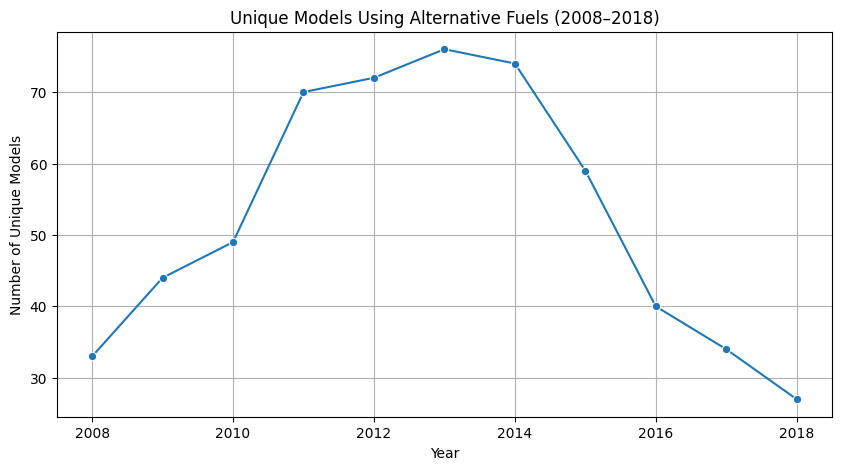

Unique models using alternative fuels in 2008: 33
Unique models using alternative fuels in 2018: 27

No, 2018 does not have more unique models than other years.


In [ ]:
# Filtering for alternative fuels (exclude all fuel types containing Gasoline or Diesel)
alt_fuel_df = df_all[~df_all['Fuel'].str.contains('Gasoline|Diesel', case=False)]

# Counting unique models per year and sort by year
alt_fuel_counts = alt_fuel_df.groupby('Year')['Model'].nunique().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=alt_fuel_counts.index, y=alt_fuel_counts.values, marker='o')
plt.title('Unique Models Using Alternative Fuels (2008–2018)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models')
plt.grid(True)
plt.show()

# Printing unique models for 2008 and 2018
print("Unique models using alternative fuels in 2008:", alt_fuel_counts.get(2008, 0))  # Default to 0 if no data for 2008
print("Unique models using alternative fuels in 2018:", alt_fuel_counts.get(2018, 0))  # Default to 0 if no data for 2018

# Finding the number of unique models in 2018
models_2018 = alt_fuel_counts.get(2018, 0)

# Finding the maximum number of unique models in any other year (excluding 2018)
max_other_years = alt_fuel_counts.drop(2018, errors='ignore').max()  # Exclude 2018

print()

# Calculating the difference if 2018 has more models
if models_2018 > max_other_years:
    difference = models_2018 - max_other_years
    print(f"Yes, there are more unique models using alternative fuels in 2018 compared to other years. By {difference} models.")
else:
    print("No, 2018 does not have more unique models than other years.")


The key findings were:

- **Unique Models Using Alternative Fuels in 2008**: 33 models  
- **Unique Models Using Alternative Fuels in 2018**: 27 models  

**Conclusion**: No, 2018 did not have more unique models using alternative fuels than other years.


In [ ]:
# Checking the data types of the columns
print(df_all[['City MPG']].dtypes)

In [ ]:
# Convert 'City MPG' to numeric, forcing errors to NaN
df_all['City MPG'] = pd.to_numeric(df_all['City MPG'], errors='coerce')

### 2. How Much Have Vehicle Classes Improved in Fuel Economy (MPG) Per Year?

We analyzed the year-over-year improvement in fuel economy (City MPG) for each vehicle class over the span of 2008 to 2018. The results were visualized through a line plot showing the improvements in fuel economy for various vehicle classes. Additionally, the average yearly improvement in MPG for each class was calculated and presented in a table.

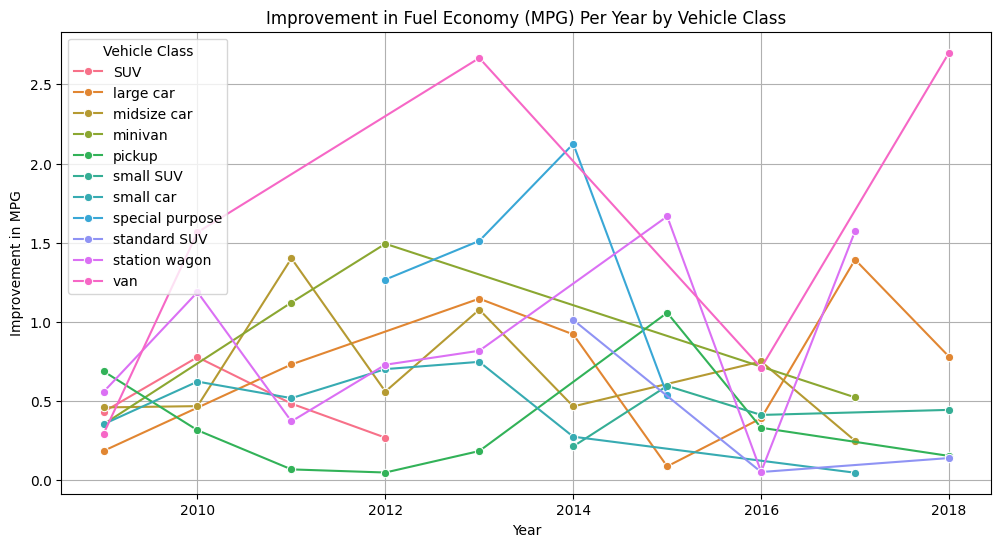

Average improvement in fuel economy (MPG) per year by vehicle class:
Veh Class
SUV                0.489341
large car          0.703623
midsize car        0.677991
minivan            0.872256
pickup             0.354852
small SUV          0.415429
small car          0.465640
special purpose    1.359848
standard SUV       0.400353
station wagon      0.868808
van                1.586580
Name: MPG_Change, dtype: float64


In [ ]:
# Grouping by 'Veh Class' and 'Year' and calculate the average fuel economy (mpg)
fuel_economy_by_class = df_all.groupby(['Veh Class', 'Year'])['City MPG'].mean().reset_index()

# Calculating the year-over-year change in fuel economy (mpg) for each vehicle class
fuel_economy_by_class['MPG_Change'] = fuel_economy_by_class.groupby('Veh Class')['City MPG'].diff()

# Filtering for positive changes to focus on improvements
improvements_by_class = fuel_economy_by_class[fuel_economy_by_class['MPG_Change'] > 0]

# Plotting the improvements per vehicle class over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=improvements_by_class, x='Year', y='MPG_Change', hue='Veh Class', marker='o')
plt.title('Improvement in Fuel Economy (MPG) Per Year by Vehicle Class')
plt.xlabel('Year')
plt.ylabel('Improvement in MPG')
plt.grid(True)
plt.legend(title='Vehicle Class')
plt.show()

# Printing the average improvement in MPG per year for each class
avg_improvement = improvements_by_class.groupby('Veh Class')['MPG_Change'].mean()
print("Average improvement in fuel economy (MPG) per year by vehicle class:")
print(avg_improvement)


The key findings were:

- **Vehicle Classes with the Highest Average MPG Improvement**:  
  - **Van**: 1.59 MPG  
  - **Special Purpose**: 1.36 MPG  
  - **Minivan**: 0.87 MPG  
  - **Station Wagon**: 0.87 MPG  

- **Vehicle Classes with the Lowest Average MPG Improvement**:  
  - **Pickup**: 0.35 MPG  
  - **SUV**: 0.49 MPG  
  - **Standard SUV**: 0.40 MPG  

**Conclusion**: Over the years, some vehicle classes, like **Vans** and **Special Purpose** vehicles, have shown significant improvement in fuel economy, while others, such as **Pickups** and **SUVs**, have seen more modest improvements.


### 3. Characteristics of SmartWay Vehicles: Changes Over Time

We analyzed the characteristics of SmartWay vehicles over the years, focusing on their fuel economy (City MPG, Highway MPG) and Greenhouse Gas Score.

In [ ]:
# Checking how many SmartWay vehicles are there per year
smartway_count_per_year = df_all[df_all['SmartWay'] == 'Yes'].groupby('Year').size()
print(smartway_count_per_year)

Year
2013    480
2014    569
2015    477
2016    456
2017    431
2018    309
dtype: int64


<ipython-input-23-8f161fead175>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartway_df['City MPG'] = pd.to_numeric(smartway_df['City MPG'], errors='coerce')
<ipython-input-23-8f161fead175>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartway_df['Hwy MPG'] = pd.to_numeric(smartway_df['Hwy MPG'], errors='coerce')
<ipython-input-23-8f161fead175>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

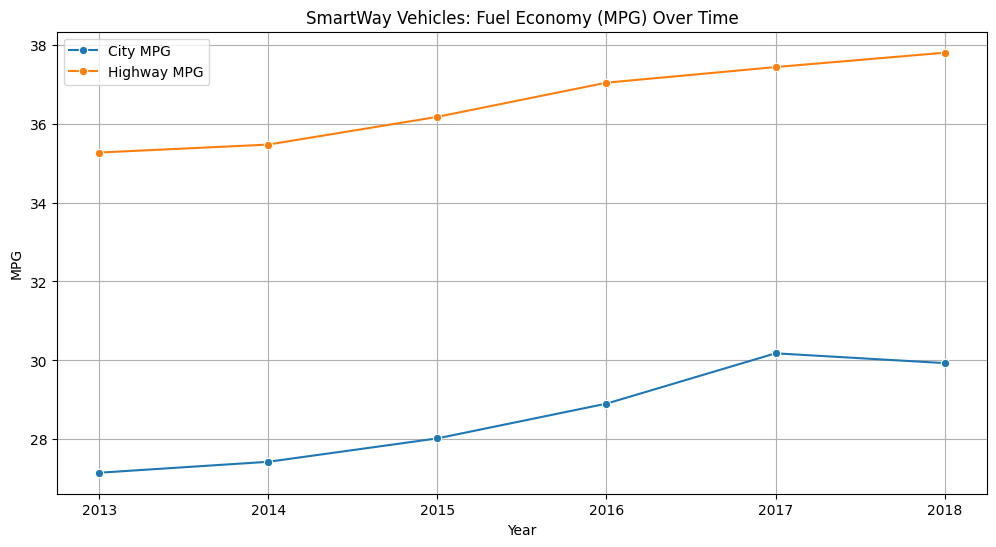

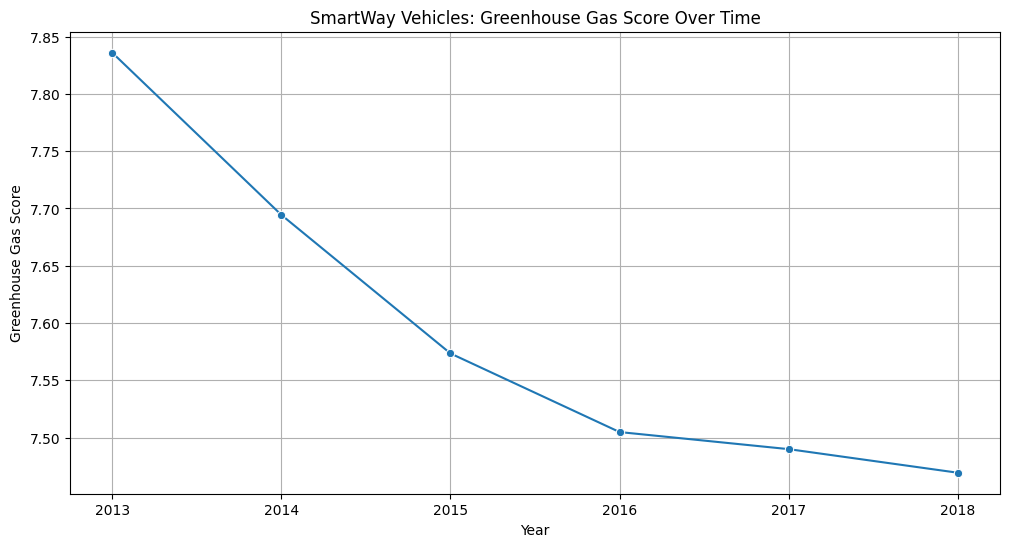

Average City MPG for SmartWay vehicles:
   Year   City MPG
0  2013  27.152993
1  2014  27.430189
2  2015  28.023310
3  2016  28.903846
4  2017  30.179293
5  2018  29.931408

Average Highway MPG for SmartWay vehicles:
   Year    Hwy MPG
0  2013  35.268293
1  2014  35.469811
2  2015  36.172494
3  2016  37.038462
4  2017  37.434343
5  2018  37.797834

Average Greenhouse Gas Score for SmartWay vehicles:
   Year  Greenhouse Gas Score
0  2013              7.835920
1  2014              7.694340
2  2015              7.573427
3  2016              7.504808
4  2017              7.489899
5  2018              7.469314


In [ ]:
# Filtering for SmartWay vehicles (assuming 'SmartWay' column indicates if the vehicle is SmartWay)
smartway_df = df_all[df_all['SmartWay'] == 'Yes']  # Assuming 'Yes' marks SmartWay vehicles

# Converting 'City MPG', 'Hwy MPG', and 'Greenhouse Gas Score' to numeric, coercing errors to NaN
smartway_df['City MPG'] = pd.to_numeric(smartway_df['City MPG'], errors='coerce')
smartway_df['Hwy MPG'] = pd.to_numeric(smartway_df['Hwy MPG'], errors='coerce')
smartway_df['Greenhouse Gas Score'] = pd.to_numeric(smartway_df['Greenhouse Gas Score'], errors='coerce')

# Droping rows with NaN values after conversion
smartway_df = smartway_df.dropna(subset=['City MPG', 'Hwy MPG', 'Greenhouse Gas Score'])

# Grouping by Year and calculate the average City MPG, Hwy MPG, and Greenhouse Gas Score for SmartWay vehicles
smartway_avg = smartway_df.groupby('Year')[['City MPG', 'Hwy MPG', 'Greenhouse Gas Score']].mean().reset_index()

# Plotting City MPG and Hwy MPG over time for SmartWay vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(data=smartway_avg, x='Year', y='City MPG', marker='o', label='City MPG')
sns.lineplot(data=smartway_avg, x='Year', y='Hwy MPG', marker='o', label='Highway MPG')
plt.title('SmartWay Vehicles: Fuel Economy (MPG) Over Time')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Greenhouse Gas Score over time for SmartWay vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(data=smartway_avg, x='Year', y='Greenhouse Gas Score', marker='o')
plt.title('SmartWay Vehicles: Greenhouse Gas Score Over Time')
plt.xlabel('Year')
plt.ylabel('Greenhouse Gas Score')
plt.grid(True)
plt.show()

print("Average City MPG for SmartWay vehicles:")
print(smartway_avg[['Year', 'City MPG']])

print("\nAverage Highway MPG for SmartWay vehicles:")
print(smartway_avg[['Year', 'Hwy MPG']])

print("\nAverage Greenhouse Gas Score for SmartWay vehicles:")
print(smartway_avg[['Year', 'Greenhouse Gas Score']])

The key findings were:

- **SmartWay Vehicle Count Per Year**: The number of SmartWay vehicles was calculated for each year.
- **City MPG**: The average City MPG for SmartWay vehicles has increased over the years, from 27.15 MPG in 2013 to 29.93 MPG in 2018.
- **Highway MPG**: The average Highway MPG has also improved, from 35.27 MPG in 2013 to 37.80 MPG in 2018.
- **Greenhouse Gas Score**: The Greenhouse Gas Score has slightly decreased from 7.84 in 2013 to 7.47 in 2018, indicating better overall environmental performance.

**Conclusion**: Over the years, SmartWay vehicles have shown improvements in fuel economy, both for City and Highway MPG. However, the Greenhouse Gas Score has slightly decreased, although it remains within an environmentally friendly range.


### 4. Features Associated with Better Fuel Economy (MPG)

We analyzed the relationships between various features such as Engine Displacement (Displ), Cylinder Count (Cyl), and Greenhouse Gas Score with fuel economy (City MPG and Highway MPG).


In [ ]:
df_all['Cyl'] = df_all['Cyl'].str.extract('(\d+)').astype(float)

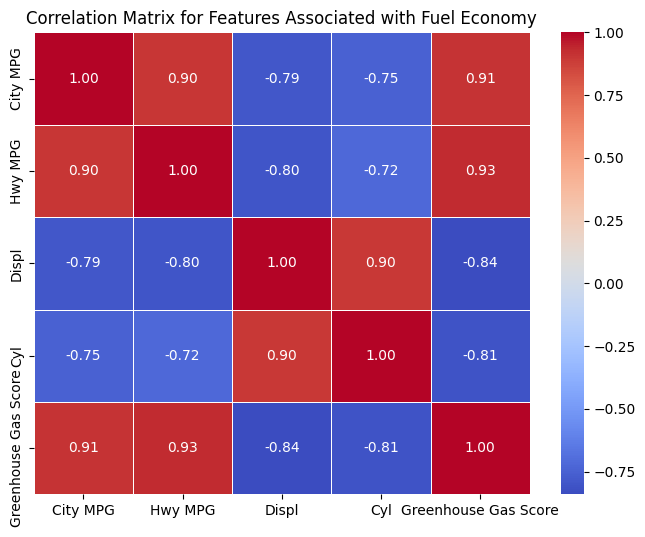

                      City MPG   Hwy MPG     Displ       Cyl  \
City MPG              1.000000  0.904805 -0.792160 -0.751953   
Hwy MPG               0.904805  1.000000 -0.798288 -0.723775   
Displ                -0.792160 -0.798288  1.000000  0.895006   
Cyl                  -0.751953 -0.723775  0.895006  1.000000   
Greenhouse Gas Score  0.911876  0.932315 -0.840671 -0.810521   

                      Greenhouse Gas Score  
City MPG                          0.911876  
Hwy MPG                           0.932315  
Displ                            -0.840671  
Cyl                              -0.810521  
Greenhouse Gas Score              1.000000  


In [ ]:
# Droping rows with NaN values in relevant columns
df_all_clean = df_all.dropna(subset=['City MPG', 'Hwy MPG', 'Displ', 'Cyl', 'Fuel', 'Veh Class'])

# Calculating the correlation between numerical features and City MPG (or Highway MPG)
corr_matrix = df_all_clean[['City MPG', 'Hwy MPG', 'Displ', 'Cyl', 'Greenhouse Gas Score']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Features Associated with Fuel Economy')
plt.show()

# Printing the correlation values for further analysis
print(corr_matrix)

The key findings were:

- **Correlation with City MPG**:
  - **Engine Displacement (Displ)** and **Cylinder Count (Cyl)** show a **negative correlation** with City MPG, meaning that as the engine displacement and cylinder count increase, the City MPG tends to decrease.
  - **Greenhouse Gas Score** has a **positive correlation** with City MPG, indicating that vehicles with higher environmental performance (lower emissions) generally have better City MPG.

- **Correlation with Highway MPG**:
  - Both **Engine Displacement** and **Cylinder Count** show a **negative correlation** with Highway MPG as well, suggesting that larger engines and more cylinders are associated with lower Highway MPG.
  - **Greenhouse Gas Score** shows a **positive correlation** with Highway MPG, indicating that environmentally friendly vehicles tend to perform better in terms of fuel efficiency on highways too.

**Conclusion**: Vehicles with smaller engine displacement (Displ) and fewer cylinders (Cyl) tend to have better fuel economy (higher City and Highway MPG). Additionally, vehicles with better Greenhouse Gas Scores are also more fuel-efficient in both city and highway driving.